# Классификация текстов

**Условие:**

Разработать скрипт, который будет с адекватным качеством классифицировать тексты по стилю (“разговорный”, “техническая литература”, “художественная литература”). 

(качество может быть ограничено лимитированным временем).

Обучающий датасет не предоставляется. 

In [1]:
import pandas as pd
import matplotlib.pyplot as plt
import random
import numpy as np

## Разговорный датасет

Для разговорных примеров возьмем датасет состоящий из твиттов пользователей https://www.kaggle.com/jp797498e/twitter-entity-sentiment-analysis/version/2?select=twitter_training.csv

In [2]:
def draw_stats(data):
  plt.hist(data.apply(lambda x: len(x[0]), axis=1))
  print("stats : ", data.apply(lambda x: len(x[0]), axis=1).describe(), sep="\n")
  print("samples = ", len(data))
  print(data.head())

stats : 
count    74682.000000
mean       107.811963
std         79.798839
min          1.000000
25%         45.000000
50%         90.000000
75%        152.000000
max        957.000000
dtype: float64
samples =  74682
                                                text  target
0  im getting on borderlands and i will murder yo...       0
1  I am coming to the borders and I will kill you...       0
2  im getting on borderlands and i will kill you ...       0
3  im coming on borderlands and i will murder you...       0
4  im getting on borderlands 2 and i will murder ...       0


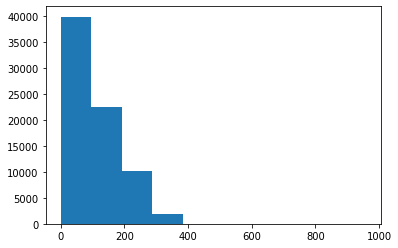

In [3]:
сolloquialism_data = pd.read_csv('twitter_training.csv', usecols=[3], names=['text'])
сolloquialism_data["text"] = сolloquialism_data["text"].astype(str)
сolloquialism_data["target"] = 0
draw_stats(сolloquialism_data)

Имеем 75 тысяч примеров со средней длинной в 40-150 символов

## Техническая литература

В качестве технической литературы был взят датасет со статьями с конференции NIPS - https://www.kaggle.com/benhamner/nips-papers

stats : 
count      7241.000000
mean      28341.271371
std        7769.765284
min           9.000000
25%       21827.000000
50%       29536.000000
75%       34219.000000
max      123727.000000
dtype: float64
samples =  7241
                                                text  target
0  767\n\nSELF-ORGANIZATION OF ASSOCIATIVE DATABA...       1
1  683\n\nA MEAN FIELD THEORY OF LAYER IV OF VISU...       1
2  394\n\nSTORING COVARIANCE BY THE ASSOCIATIVE\n...       1
3  Bayesian Query Construction for Neural\nNetwor...       1
4  Neural Network Ensembles, Cross\nValidation, a...       1


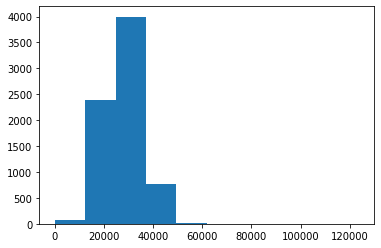

In [4]:
tech_data = pd.read_csv('papers.csv', usecols=["paper_text"])
tech_data["text"] = tech_data["paper_text"].astype(str)
tech_data["target"] = 1
tech_data = tech_data.drop('paper_text', 1)

draw_stats(tech_data)

Тут мы видим, что длинна текстов намного больше, чем у твиттера. Поэтому давайте возьмем случайные подстроки из каждой статьи длинной от 40 до 150 символов так, чтобы размеры датасетов совпадали

In [5]:
def get_random_str(main_str):
    substr_len = random.randint(min(len(main_str), 40), min(len(main_str), 150))
    start = random.randrange(0, len(main_str) - substr_len + 1)
    return main_str[start : (start + substr_len)]

def extract_random_substrings(x):
    for i in range(count):
      generated_data.append(get_random_str(x))

stats : 
count    72410.000000
mean        94.949441
std         32.063320
min          9.000000
25%         67.000000
50%         95.000000
75%        123.000000
max        150.000000
dtype: float64
samples =  72410
                                                text  target
0  tiveness.\nWe denote a sequence of observed sa...       1
1  e\nrecursive type shows strongly its effective...       1
2  a sample sequence\nof (x, y) reflecting the co...       1
3  laboratories exist in (Fig. 5). Because of an ...       1
4  eaf.\nNotations nand\nd(xt, x[n)), let n\n\nn ...       1


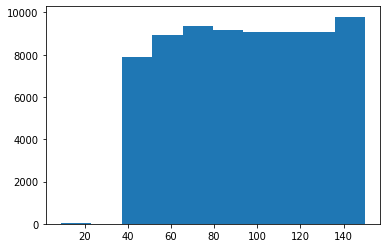

In [6]:
generated_data = []
count = 10
tech_data["text"].apply(extract_random_substrings)

tech_data_parsed = pd.DataFrame(data={"text": generated_data, "target": [1] * len(generated_data)})

draw_stats(tech_data_parsed)

Получили примерно такое же количество примеров, что и для твиттера, с примерно таким же количеством символов в каждом примере

## Художественная литература

В качестве примеров художественной литературы были взяти несколько классических произведений в txt формате

stats : 
count    7.000000e+00
mean     5.838939e+05
std      4.098368e+05
min      1.508860e+05
25%      2.269905e+05
50%      5.253770e+05
75%      8.758045e+05
max      1.205404e+06
dtype: float64
samples =  7
                                                text  target
0            PROJECT GUTENBERG AND DUNCAN RESEARC...       2
0  [pg/etext94/emma10.txt]\n\nEmma, by Jane Auste...       2
0                                        1894\n\n...       2
0                                        1903\n\n...       2
0  Preliminary Matter.  \n\nThis text of Melville...       2


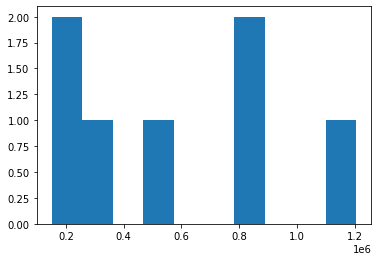

In [7]:
lit_datas = []
for filename in ("alice.txt", "austen-emma-754.txt", "kipling-jungle-148.txt", 
                 "london-call-203.txt", "mobydick.txt", "dracula.txt", "journey.txt"):
  lit_current = pd.DataFrame(data={"text": [open(filename).read()], "target": [2]})
  lit_datas.append(lit_current)

lit_data = pd.concat(lit_datas)

draw_stats(lit_data)

Аналогично технической литературе возьмем из них лишь некоторые подстроки небольшой длинны так, чтобы размер датасета был примерно сопоставим с датасетом твиттера

stats : 
count    77000.000000
mean        94.865182
std         32.096521
min         40.000000
25%         67.000000
50%         95.000000
75%        123.000000
max        150.000000
dtype: float64
samples =  77000
                                                text  target
0  \nsubject.\n\n  `Go on with the next verse,' t...       2
1  sometimes she scolded herself so\nseverely as ...       2
2  arm a great\nletter, nearly as large as himsel...       2
3  just in time to hear it\nsay, as it turned a c...       2
4  Mary Ann!' said the voice.  `Fetch me my glove...       2


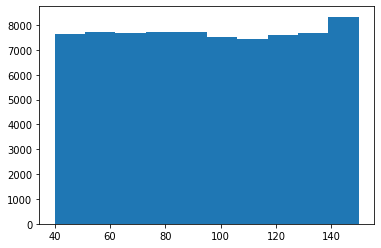

In [8]:
generated_data = []
count = 11000
lit_data["text"].apply(extract_random_substrings)

lit_data_parsed = pd.DataFrame(data={"text": generated_data, "target": [2] * len(generated_data)})

draw_stats(lit_data_parsed)

Объединим все датасеты в один

In [9]:
data = pd.concat([сolloquialism_data, tech_data_parsed, lit_data_parsed])
data

,text,target
0,im getting on borderlands and i will murder yo...,0
1,I am coming to the borders and I will kill you...,0
2,im getting on borderlands and i will kill you ...,0
3,im coming on borderlands and i will murder you...,0
4,im getting on borderlands 2 and i will murder ...,0
...,...,...
76995,ge the narrow limits of our raft for the myste...,2
76996,spur of rock came down through the arid groun...,2
76997,{CHAPTER_2 ^paragraph 45}\n,2
76998,ney of a volcano there could no longer\nbe the...,2


Разделим выборку на трейн и тест

In [10]:
from sklearn.model_selection import train_test_split
texts = data['text'].values
target = data['target'].values
texts_train, texts_test, y_train, y_test = train_test_split(texts, target, test_size=0.2, random_state=42)

Добавим токенизатор для того, чтобы учесть знаки пунктуации и распарсить слова

In [11]:
from nltk.tokenize import WordPunctTokenizer

tokenizer = WordPunctTokenizer()
texts_train = [' '.join(tokenizer.tokenize(text.lower())) for text in texts_train]
texts_test = [' '.join(tokenizer.tokenize(text.lower())) for text in texts_test]

Для обучения будем использовать tfidf токенизатор, который определенным образом учитывает вхождение каждого слова в текст и строит матрицу TF-IDF фичей

In [12]:
from sklearn.feature_extraction.text import TfidfVectorizer

vectorizer = TfidfVectorizer()
X_train = vectorizer.fit_transform(texts_train)
X_test = vectorizer.transform(texts_test)

Попробуем в самом простом случае применить логистическую регрессию на нескольких классах (а именно трех)

In [13]:
from sklearn.linear_model import LogisticRegression

tf_idf_model = LogisticRegression(max_iter=1000).fit(X_train, y_train)

Посмотрим на качество

In [14]:
from sklearn.metrics import accuracy_score

for name, X, y, model in [
    ('train', X_train, y_train, tf_idf_model),
    ('test ', X_test, y_test, tf_idf_model)
]:
    print("accuracy on", name, "=", accuracy_score(y, model.predict(X)))

accuracy on train = 0.9840801459226989
accuracy on test  = 0.9733372007407572


Как ни странно, но модель очень хорошо обучилась и мы получили очень хорошее качество на тесте. Применять более сложные модели в данном случае не вижу смысла

Проверим нашу модель на каких-то придуманных самими примерах

In [25]:
texts = ["I love girls", "How are you today?", "Neural networks worked well with dropout", "London is a very beautiful place", "Happy families are all alike; every unhappy family is unhappy in its own way."]

parsed_texts = [' '.join(tokenizer.tokenize(text.lower())) for text in texts]
parsed_texts = vectorizer.transform(parsed_texts)
for text, res in zip(texts, model.predict(parsed_texts)):
  print(text, " - ", end="")
  if res == 0: 
    print("разговорный")
  elif res == 1: 
    print("техническая литература")
  else: 
    print("художественная литература")


I love girls  - разговорный
How are you today?  - разговорный
Neural networks worked well with dropout  - техническая литература
London is a very beautiful place  - художественная литература
Happy families are all alike; every unhappy family is unhappy in its own way.  - художественная литература


Работает очень даже неплохо

Сохраним модель для применения

In [19]:
import pickle

pickle.dump(vectorizer, open("tfidf.pickle", "wb"))
pickle.dump(model, open("model.pickle", "wb"))

Попробуем загрузить модель и применить ее на конкретном примере

In [26]:
with open("model.pickle", 'rb') as f:
  model_load = pickle.load(f)

with open("tfidf.pickle", 'rb') as f:
  vectorizer_load = pickle.load(f)

curr_text = "I'm fine, thanks"


parsed_text = ' '.join(tokenizer.tokenize(curr_text.lower()))
parsed_text = vectorizer_load.transform([parsed_text])
res = model_load.predict(parsed_text)[0]
print(curr_text, " - ", end="")
if res == 0: 
  print("разговорный")
elif res == 1: 
  print("техническая литература")
else: 
  print("художественная литература")

I'm fine, thanks  - разговорный


Отлично, всё работает!